In [17]:
import os
from pathlib import Path
def get_all_img_idx(dataset_base):
    rgb_basepath = os.path.join(dataset_base,'img/rgb')
    ids = [int(x.stem) for x in Path(rgb_basepath).glob("*.png") if not x.stem.startswith('.')]
    return sorted(ids)

def gen_paths_from_id(root,id):
    rgb_path = os.path.join(root,f'img/rgb/{id}.png')
    depth_path = os.path.join(root, f'img/depth/{id}.npy')
    return {'image_l':rgb_path, "depth_l":depth_path}

In [33]:
dataset_base = "/hadatasets/synscapes/"
ids = get_all_img_idx(dataset_base)

same = []
for i, id in enumerate(ids):
    same.append(i+1 == id)
len(same)

25000

In [24]:
import random
import json

dataset_base = "/hadatasets/synscapes/"
ids = get_all_img_idx(dataset_base)
random.shuffle(ids)
ds_size = len(ids)

train_max = int(ds_size*0.6)

val_max = int(train_max + ds_size*0.2)

train_ids = ids[:train_max]
val_ids = ids[train_max:val_max]
test_ids = ids[val_max:]

splits = {'train':train_ids,'val':val_ids, 'test':test_ids}

with open('../configs/synscapes_split.json', 'x') as f:
    json.dump(splits,f)

In [30]:
gen_paths_from_id(dataset_base,1010)

{'image_l': '/hadatasets/synscapes/img/rgb/1010.png',
 'depth_l': '/hadatasets/synscapes/img/depth/1010.exr'}

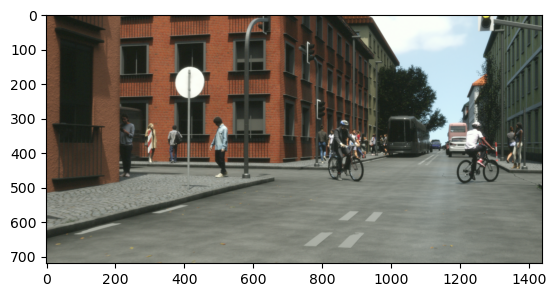

In [5]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/hadatasets/synscapes/img/rgb/1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

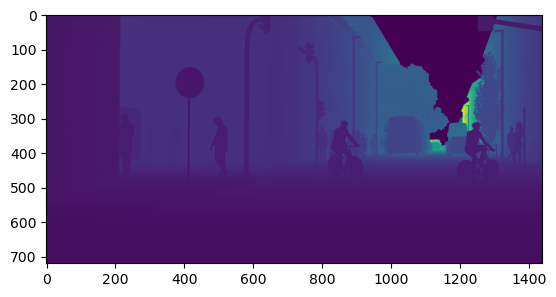

In [4]:
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2, numpy as np

from matplotlib import pyplot as plt
img = np.load("/hadatasets/synscapes/img/depth/1.npy")
plt.imshow(img)


In [13]:
import numpy as np
import cv2

a = np.ones((100,100,1),dtype='float32')
a *= 1.5

cv2.imwrite('a.exr', a)


True

In [15]:
cv2.imread('a.exr',cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH | cv2.IMREAD_UNCHANGED)

array([[1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       ...,
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5]], dtype=float32)

In [ ]:
def load_depth_map(path, pt=Imath.PixelType(Imath.PixelType.FLOAT)):
    inp = OpenEXR.InputFile(path)
    dw = inp.header()['dataWindow']
    size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)
    buffer = inp.channel('Z', pt)
    depth = np.frombuffer(buffer, dtype=np.float32)
    depth.shape = (size[1], size[0]) # Numpy arrays are (row, col)
    depth = depth.copy() # current array is readonly
    return depth